# Project 08. Song Challenge

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize

plt.rcParams["patch.force_edgecolor"] = True
sns.set_style('whitegrid')
%matplotlib inline


# Table of Contents
  1. [Read Data](#readdata)

<a id='read_data'></a>
## Read Data

In [159]:
data = pd.read_json('C:/Users/xiaoj/Desktop/CS/collection of data science-take home challenges/Data/8. song.json')
data.head()

,id,user_id,user_state,user_sign_up_date,song_played,time_played
0,GOQMMKSQQH,122,Louisiana,2015-05-16,Hey Jude,2015-06-11 21:51:35
1,HWKKBQKNWI,3,Ohio,2015-05-01,We Can Work It Out,2015-06-06 16:49:19
2,DKQSXVNJDH,35,New Jersey,2015-05-04,Back In the U.S.S.R.,2015-06-14 02:11:29
3,HLHRIDQTUW,126,Illinois,2015-05-16,P.s. I Love You,2015-06-08 12:26:10
4,SUKJCSBCYW,6,New Jersey,2015-05-01,Sgt. Pepper's Lonely Hearts Club Band,2015-06-28 14:57:00


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 4000 non-null   object
 1   user_id            4000 non-null   int64 
 2   user_state         4000 non-null   object
 3   user_sign_up_date  4000 non-null   object
 4   song_played        4000 non-null   object
 5   time_played        4000 non-null   object
dtypes: int64(1), object(5)
memory usage: 187.6+ KB


In [16]:
# transfer two time-related field from 'object' to time
data['user_sign_up_date'] = pd.to_datetime(data['user_sign_up_date'])
data['time_played'] = pd.to_datetime(data['time_played'])

In [17]:
# check if there are any null or NaN values
data.isnull().sum()

id                   0
user_id              0
user_state           0
user_sign_up_date    0
song_played          0
time_played          0
dtype: int64

In [18]:
# check the unique values
columns=['song_played','user_id','user_state']
[data[column].nunique() for column in columns]

[97, 196, 41]

<a id='Question1'></a>
## Question 1
What are the top 3 and the bottom 3 states in terms of number of users?

In [19]:
# sort the state according to their corresponding user counts
state_user_count = data.groupby('user_state')['user_id'].apply(lambda id:len(np.unique(id)))
state_user_count.sort_values(inplace=True, ascending = False)
state_user_count

user_state
New York          23
California        21
Texas             15
Pennsylvania       9
Ohio               9
Florida            7
Illinois           7
Georgia            6
New Jersey         6
North Carolina     6
Massachusetts      6
Michigan           5
Wisconsin          5
Maryland           5
Louisiana          5
Missouri           5
Tennessee          5
Indiana            4
Minnesota          4
Alabama            4
West Virginia      3
Oregon             3
Colorado           3
Kentucky           3
South Carolina     3
Mississippi        3
Oklahoma           2
Utah               2
Virginia           2
Washington         2
Arkansas           2
Alaska             2
North Dakota       1
Kansas             1
Iowa               1
Rhode Island       1
Nebraska           1
Idaho              1
Connecticut        1
New Mexico         1
Arizona            1
Name: user_id, dtype: int64

In [20]:
# Top 3 state 
state_user_count.iloc[:3]

user_state
New York      23
California    21
Texas         15
Name: user_id, dtype: int64

In [21]:
# Bottom 3 states, since the last 9 states has the same user counts, all of them have been shown here
state_user_count.iloc[-9:]

user_state
North Dakota    1
Kansas          1
Iowa            1
Rhode Island    1
Nebraska        1
Idaho           1
Connecticut     1
New Mexico      1
Arizona         1
Name: user_id, dtype: int64

Text(0.5, 0, 'User Counts')

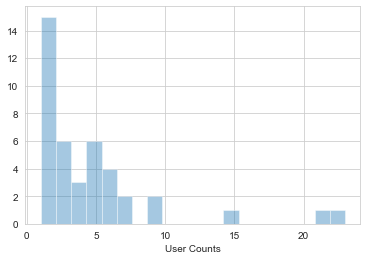

In [35]:
# visualization of distribution of the user counts(method 1)
sns.distplot(state_user_count,bins = 20,kde=False,norm_hist=False)
plt.xlabel('User Counts')

(array([15.,  6.,  3.,  6.,  4.,  2.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ,
        13.1, 14.2, 15.3, 16.4, 17.5, 18.6, 19.7, 20.8, 21.9, 23. ]),
 <a list of 20 Patch objects>)

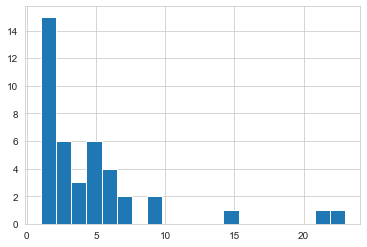

In [34]:
# visualization of distribution of the user counts（method 2）
plt.hist(state_user_count,bins=20)

<a id='question2'></a>
## Question 2
What are the top 3 and the bottom 3 states in terms of user engagement?

Here I define the user engagement is the average play events per user in the State where the sign-up customers are at least equal to be 4.

In [15]:
# create a dataframe that include the state_play_count and state_user_count
state_play_count = data.groupby('user_state')['song_played'].count()

user_play = pd.merge(left=state_user_count, right=state_play_count,on='user_state')

#create the average songs played per user
user_play['average_play'] = round(state_play_count/state_user_count,1)

#sort the user_play according to the 'average_play'
user_play = user_play.sort_values(by='average_play', ascending= False)

# to locate the state where the sign-up users >=4
state_user_play = user_play[user_play['user_id']>=4]
state_user_play

,user_id,song_played,average_play
user_state,,,
Alabama,4,104,26.0
Florida,7,180,25.7
North Carolina,6,154,25.7
Missouri,5,127,25.4
Ohio,9,209,23.2
Georgia,6,135,22.5
Maryland,5,112,22.4
Illinois,7,149,21.3
Louisiana,5,105,21.0


In [16]:
# get the top 3 states
state_user_play.iloc[:3]

,user_id,song_played,average_play
user_state,,,
Alabama,4,104,26.0
Florida,7,180,25.7
North Carolina,6,154,25.7


In [18]:
# get the bottom 3 states
state_user_play.iloc[-3:]

,user_id,song_played,average_play
user_state,,,
Massachusetts,6,91,15.2
Indiana,4,55,13.8
Minnesota,4,42,10.5


<a id='question3'></a>
## Question 3
The CEO wants to send a gift to the first user who signed up for each state. Give hime a list of those users?

In [79]:
data.groupby(user_state')['user_sign_up_date'].argmin()

AttributeError: 'SeriesGroupBy' object has no attribute 'argmin'

In [211]:
# define function to find the first user
def first_signup(df):
    idx=df['user_sign_up_date'].argmin()
    return df.loc[idx, ['user_id','user_sign_up_date']]

#find the first sign up users in each state
data.groupby('user_state').apply(first_signup)

TypeError: reduction operation 'argmin' not allowed for this dtype

<a id='question4'></a>
## Question 4
Build a function that takes as an input any of the songs in the data and returns the most likely song to be listened next. That is, if, for instance, a user is currently listening to "Eight Days A Week", which song has the highest probability of being played right after it by the same user? This is going to be v1 of a song recommendation model.

To give the song recommendation, I will choose the 'Collaborative Filtering' algorithm, which means if two songs are both liked by the same set of users, then they must be similar.

In [90]:
data.head()

,id,user_id,user_state,user_sign_up_date,song_played,time_played
0,GOQMMKSQQH,122,Louisiana,2015-05-16,Hey Jude,2015-06-11 21:51:35
1,HWKKBQKNWI,3,Ohio,2015-05-01,We Can Work It Out,2015-06-06 16:49:19
2,DKQSXVNJDH,35,New Jersey,2015-05-04,Back In the U.S.S.R.,2015-06-14 02:11:29
3,HLHRIDQTUW,126,Illinois,2015-05-16,P.s. I Love You,2015-06-08 12:26:10
4,SUKJCSBCYW,6,New Jersey,2015-05-01,Sgt. Pepper's Lonely Hearts Club Band,2015-06-28 14:57:00


In [107]:
data.groupby('song_played')['user_id'].count().sort_values(ascending=False).head()

song_played
Come Together        408
Revolution           321
Get Back             279
A Day In The Life    189
Let It Be            184
Name: user_id, dtype: int64

In [109]:
data.groupby('song_played')['user_id'].nunique().sort_values(ascending=False).head()

song_played
Come Together    150
Revolution       141
Get Back         138
Hello Goodbye    110
Let It Be        109
Name: user_id, dtype: int64

In [119]:
count=pd.DataFrame(data.groupby('song_played')['user_id'].count().sort_values(ascending=False))
count['count of people']=data.groupby('song_played')['user_id'].nunique().sort_values(ascending=False)
count=count.rename(columns={'user_id':"play counts"})
count.head()

,play counts,count of people
song_played,,
Come Together,408,150
Revolution,321,141
Get Back,279,138
A Day In The Life,189,104
Let It Be,184,109


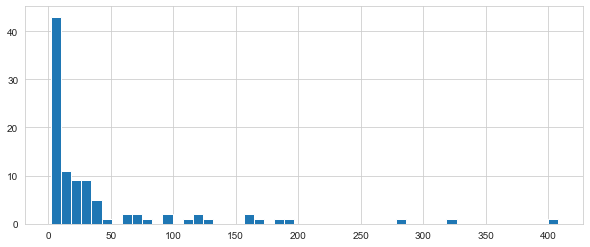

In [125]:
plt.figure(figsize=(10,4))
count['play counts'].hist(bins=50)

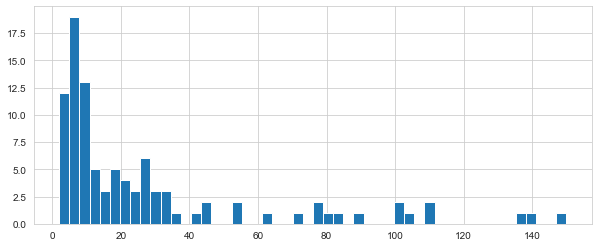

In [126]:
plt.figure(figsize=(10,4))
count['count of people'].hist(bins=50)

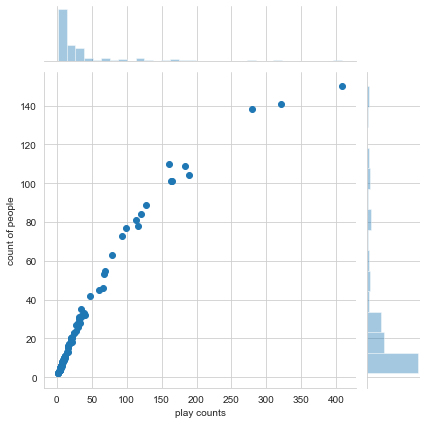

In [161]:
sns.jointplot(x='play counts',y='count of people',data=count)

In [165]:
per_count=pd.DataFrame(data.groupby(['song_played','user_id'])['id'].count())
per_count.sort_values('id',ascending=False)

id
song_played                    user_id    
Revolution                     96       10
Come Together                  55        8
                               85        8
                               98        8
                               35        7
...                                     ..
Here Comes The Sun             37        1
                               33        1
                               32        1
                               27        1
You're Going To Lose That Girl 70        1

[2743 rows x 1 columns]

In [155]:
song_user = data.groupby(['song_played','user_id'])['id'].count().unstack(fill_value=0)

id                                      \
user_id                             1   2   3   4   5   6   7   8   9   10    
song_played                                                                   
A Day In The Life                     0   0   1   3   0   2   0   0   0   0   
A Hard Day's Night                    0   0   0   0   0   1   0   0   1   0   
A Saturday Club Xmas/Crimble Medley   0   0   0   0   0   0   0   0   0   0   
ANYTIME AT ALL                        0   0   0   0   0   0   0   0   0   0   
Across The Universe                   0   0   0   1   0   0   0   0   0   0   
...                                  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
YOUR MOTHER SHOULD KNOW               0   0   0   0   0   0   0   0   0   0   
Yellow Submarine                      0   0   0   0   0   0   1   0   0   0   
Yesterday                             1   1   0   0   0   0   0   0   1   0   
You Never Give Me Your Money          0   1   0   0   0   0   0   0   0   0   
You're Going To Lose That Girl        0   0   0   0   0   0   0   0   0   0   

                                     ...                                      \
user_id                              ... 191 192 193 194 195 196 197 198 199   
song_played                          ...                                       
A Day In The Life                    ...   0   0   3   3   0   2   0   0   2   
A Hard Day's Night                   ...   0   0   0   0   1   0   0   0   0   
A Saturday Club Xmas/Crimble Medley  ...   0   0   0   0   0   0   0   0   0   
ANYTIME AT ALL                       ...   0   0   0   0   0   0   0   0   0   
Across The Universe                  ...   0   0   0   0   0   0   0   0   0   
...                                  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
YOUR MOTHER SHOULD KNOW              ...   0   0   0   0   0   0   0   0   0   
Yellow Submarine                     ...   0   0   1   0   0   0   0   0   0   
Yesterday                            ...   1   1   1   1   2   2   0   0   0   
You Never Give Me Your Money         ...   0   0   0   0   0   0   0   0   0   
You're Going To Lose That Girl       ...   0   0   0   0   0   0   0   0   0   

                                         
user_id                             200  
song_played                              
A Day In The Life                     0  
A Hard Day's Night                    0  
A Saturday Club Xmas/Crimble Medley   0  
ANYTIME AT ALL                        0  
Across The Universe                   0  
...                                  ..  
YOUR MOTHER SHOULD KNOW               0  
Yellow Submarine                      0  
Yesterday                             1  
You Never Give Me Your Money          0  
You're Going To Lose That Girl        0  

[97 rows x 196 columns]

- per_count=pd.DataFrame(data.groupby(['song_played','user_id'])['id'].count())
- per_count.pivot_table(index='song_played',columns='user_id',fill_value=0)

- song_user = data.groupby(['song_played','user_id'])['id'].count().unstack(fill_value=0)

**the above two methods are same to get the same results**

In [212]:
matrix=pd.DataFrame(data.groupby(['song_played','user_id'])['id'].count())

# values='id' need to be filled, otherwise the frame will have id before column names
matrix_t=matrix.pivot_table(index='user_id',columns='song_played',values='id',fill_value=0)
matrix_t.corrwith(matrix_t['Come Together'])

corr_come_together = pd.DataFrame(matrix_t.corrwith(matrix_t['Come Together']),columns=['correlation'])
corr_come_together.dropna(inplace=True)
corr_come_together.sort_values(by='correlation',ascending=False).head(10)

,correlation
song_played,
Come Together,1.000000
Strawberry Fields Forever,0.330876
Revolution,0.290813
Let It Be,0.279058
Hey Jude,0.268997
I've Just Seen A Face,0.240356
Things We Said Today,0.231925
I Feel Fine,0.217146
Back In the U.S.S.R.,0.216235


In [82]:
# build the song-user relationship table
song_user = data.groupby(['song_played','user_id'])['id'].count().unstack(fill_value=0)
song_user = (song_user>0).astype(int)
song_user.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
song_played,,,,,,,,,,,,,,,,,,,,,
A Day In The Life,0,0,1,1,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
A Hard Day's Night,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
A Saturday Club Xmas/Crimble Medley,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANYTIME AT ALL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Across The Universe,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
# build song-song similarity table
# normalize the song-user matrix
song_user_norm = normalize(song_user, axis = 1)

# calculate the similarity matrix
similarity = np.dot(song_user_norm, song_user_norm.T)

similarity = pd.DataFrame(similarity, index=song_user.index, columns=song_user.index)
similarity.head()

song_played,A Day In The Life,A Hard Day's Night,A Saturday Club Xmas/Crimble Medley,ANYTIME AT ALL,Across The Universe,All My Loving,All You Need Is Love,And Your Bird Can Sing,BAD BOY,Baby You're A Rich Man,...,We Can Work It Out,When I'm 64,While My Guitar Gently Weeps,Wild Honey Pie,With a Little Help From My Friends,YOUR MOTHER SHOULD KNOW,Yellow Submarine,Yesterday,You Never Give Me Your Money,You're Going To Lose That Girl
song_played,,,,,,,,,,,,,,,,,,,,,
A Day In The Life,1.000000,0.263117,0.138675,0.14825,0.131559,0.299572,0.294174,0.098058,0.228802,0.200160,...,0.525213,0.113228,0.585429,0.278503,0.539411,0.087706,0.328897,0.377141,0.163430,0.0
A Hard Day's Night,0.263117,1.000000,0.000000,0.00000,0.100000,0.146385,0.111803,0.000000,0.000000,0.091287,...,0.305788,0.129099,0.266996,0.000000,0.157027,0.000000,0.050000,0.215003,0.074536,0.0
A Saturday Club Xmas/Crimble Medley,0.138675,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.161165,0.000000,0.000000,0.182574,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
ANYTIME AT ALL,0.148250,0.000000,0.000000,1.00000,0.000000,0.164957,0.094491,0.125988,0.000000,0.000000,...,0.172292,0.000000,0.188044,0.097590,0.176950,0.000000,0.000000,0.103835,0.000000,0.0
Across The Universe,0.131559,0.100000,0.000000,0.00000,1.000000,0.097590,0.000000,0.000000,0.000000,0.000000,...,0.101929,0.000000,0.133498,0.000000,0.104685,0.000000,0.000000,0.061430,0.000000,0.0


In [162]:
# find the most similar songs of each song and its similar score
def most_similar_song(song, topk):
    similar_ones = song.sort_values(ascending = False)[1:topk+1].index
    return pd.Series(similar_ones,index=['Similar #{}'.format(i) for i in range(1,topk+1)])

def most_similar_song_score(song, topk):
    similar_ones_score = song.sort_values(ascending = False)[1:topk+1].values
    return pd.Series(similar_ones_score)

recommendation = similarity.apply(most_similar_song, topk=1, axis=1)
recommendation['score']=similarity.apply(most_similar_song_score, topk=1, axis=1)

recommendation

,Similar #1,score
song_played,,
A Day In The Life,Revolution,0.710186
A Hard Day's Night,Come Together,0.346891
A Saturday Club Xmas/Crimble Medley,GIRL,0.353553
ANYTIME AT ALL,Revolution,0.222812
Across The Universe,Birthday,0.225374
...,...,...
YOUR MOTHER SHOULD KNOW,Sgt. Pepper Inner Groove,0.269680
Yellow Submarine,Reprise / Day in the Life,0.361814
Yesterday,Come Together,0.538341


In [148]:
# find the top k most similar songs of each song
def most_similar_song(s, topk):
    similar_ones = s.sort_values(ascending = False)[1:topk+1].index
    similar_scores = s.sort_values(ascending = False)[1:topk+1].values
    return pd.Series(similar_ones,index=['Similar #{}'.format(i) for i in range(1,topk+1)])

recommendation = similarity.apply(most_similar_song, topk=3,axis=1)
recommendation

,Similar #1,Similar #2,Similar #3
song_played,,,
A Day In The Life,Revolution,Come Together,Get Back
A Hard Day's Night,Come Together,Back In the U.S.S.R.,We Can Work It Out
A Saturday Club Xmas/Crimble Medley,GIRL,IT WON'T BE LONG,I Want You (She's So Heavy)
ANYTIME AT ALL,Revolution,Helter Skelter,Come Together
Across The Universe,Birthday,LITTLE CHILD,Love Me Do
...,...,...,...
YOUR MOTHER SHOULD KNOW,Sgt. Pepper Inner Groove,When I'm 64,Cry For A Shadow
Yellow Submarine,Reprise / Day in the Life,Get Back,Eleanor Rigby
Yesterday,Come Together,With a Little Help From My Friends,Get Back


<a id='question5'></a>
## Question 5
How would you set up a test to check whether your model works well and is improving engagement?

To test whether my model works well and is improving engagement, I need to perform a A/B test:
1. Randomly split users into two groups, the control group and experiment group;
2. For control group, there will be no recommendation strategy
3. For experiment group,recommend the song calcaulated by the model
4. After running for >= 14 days and less than 30 days, perform a one-tailed t-test on the metric-'average plays per users'to see if the experiment is statistical significance:

     - H0: the average plays per users has no difference in two groups;
     
     - HA: The average plays per users in experiment groups are higher than that in control groups.
    